<a href="https://colab.research.google.com/github/holly0923p-stack/Programming_DA_AI/blob/main/PDAAI_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke Prediction

###**Task 0 Import and data loading**

#### Import Librarires

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Classification Models


# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

from sklearn import tree

# Clustering Models
!pip install kprototypes
!pip install hdbscan gower
!pip install kmodes
!pip install yellowbrick

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes
import hdbscan
import gower

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score,
    silhouette_score, davies_bouldin_score
)

#### Set styles for plots

In [83]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#### Load Dataset

In [84]:
# Load Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Dataset check

In [85]:
# Basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [86]:
# Missing values
print("Missing Values:", df.isnull().sum())

Missing Values: id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [87]:
# Duplicates
print("Duplicate Values", df.duplicated().sum())

Duplicate Values 0


In [88]:
# Basic statistics
print("Basic Statistics:", df.describe())

Basic Statistics:                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000 

In [89]:
# Target Variable class imbalance
imbalance_ratio = (len(df) - df['stroke'].sum()) / df['stroke'].sum()
print("Class Imbalance Ratio:", imbalance_ratio.round(2), ": 1")

Class Imbalance Ratio: 19.52 : 1


### **TASK 1.1 BASIC STATISTICS:** Distribution of each feature

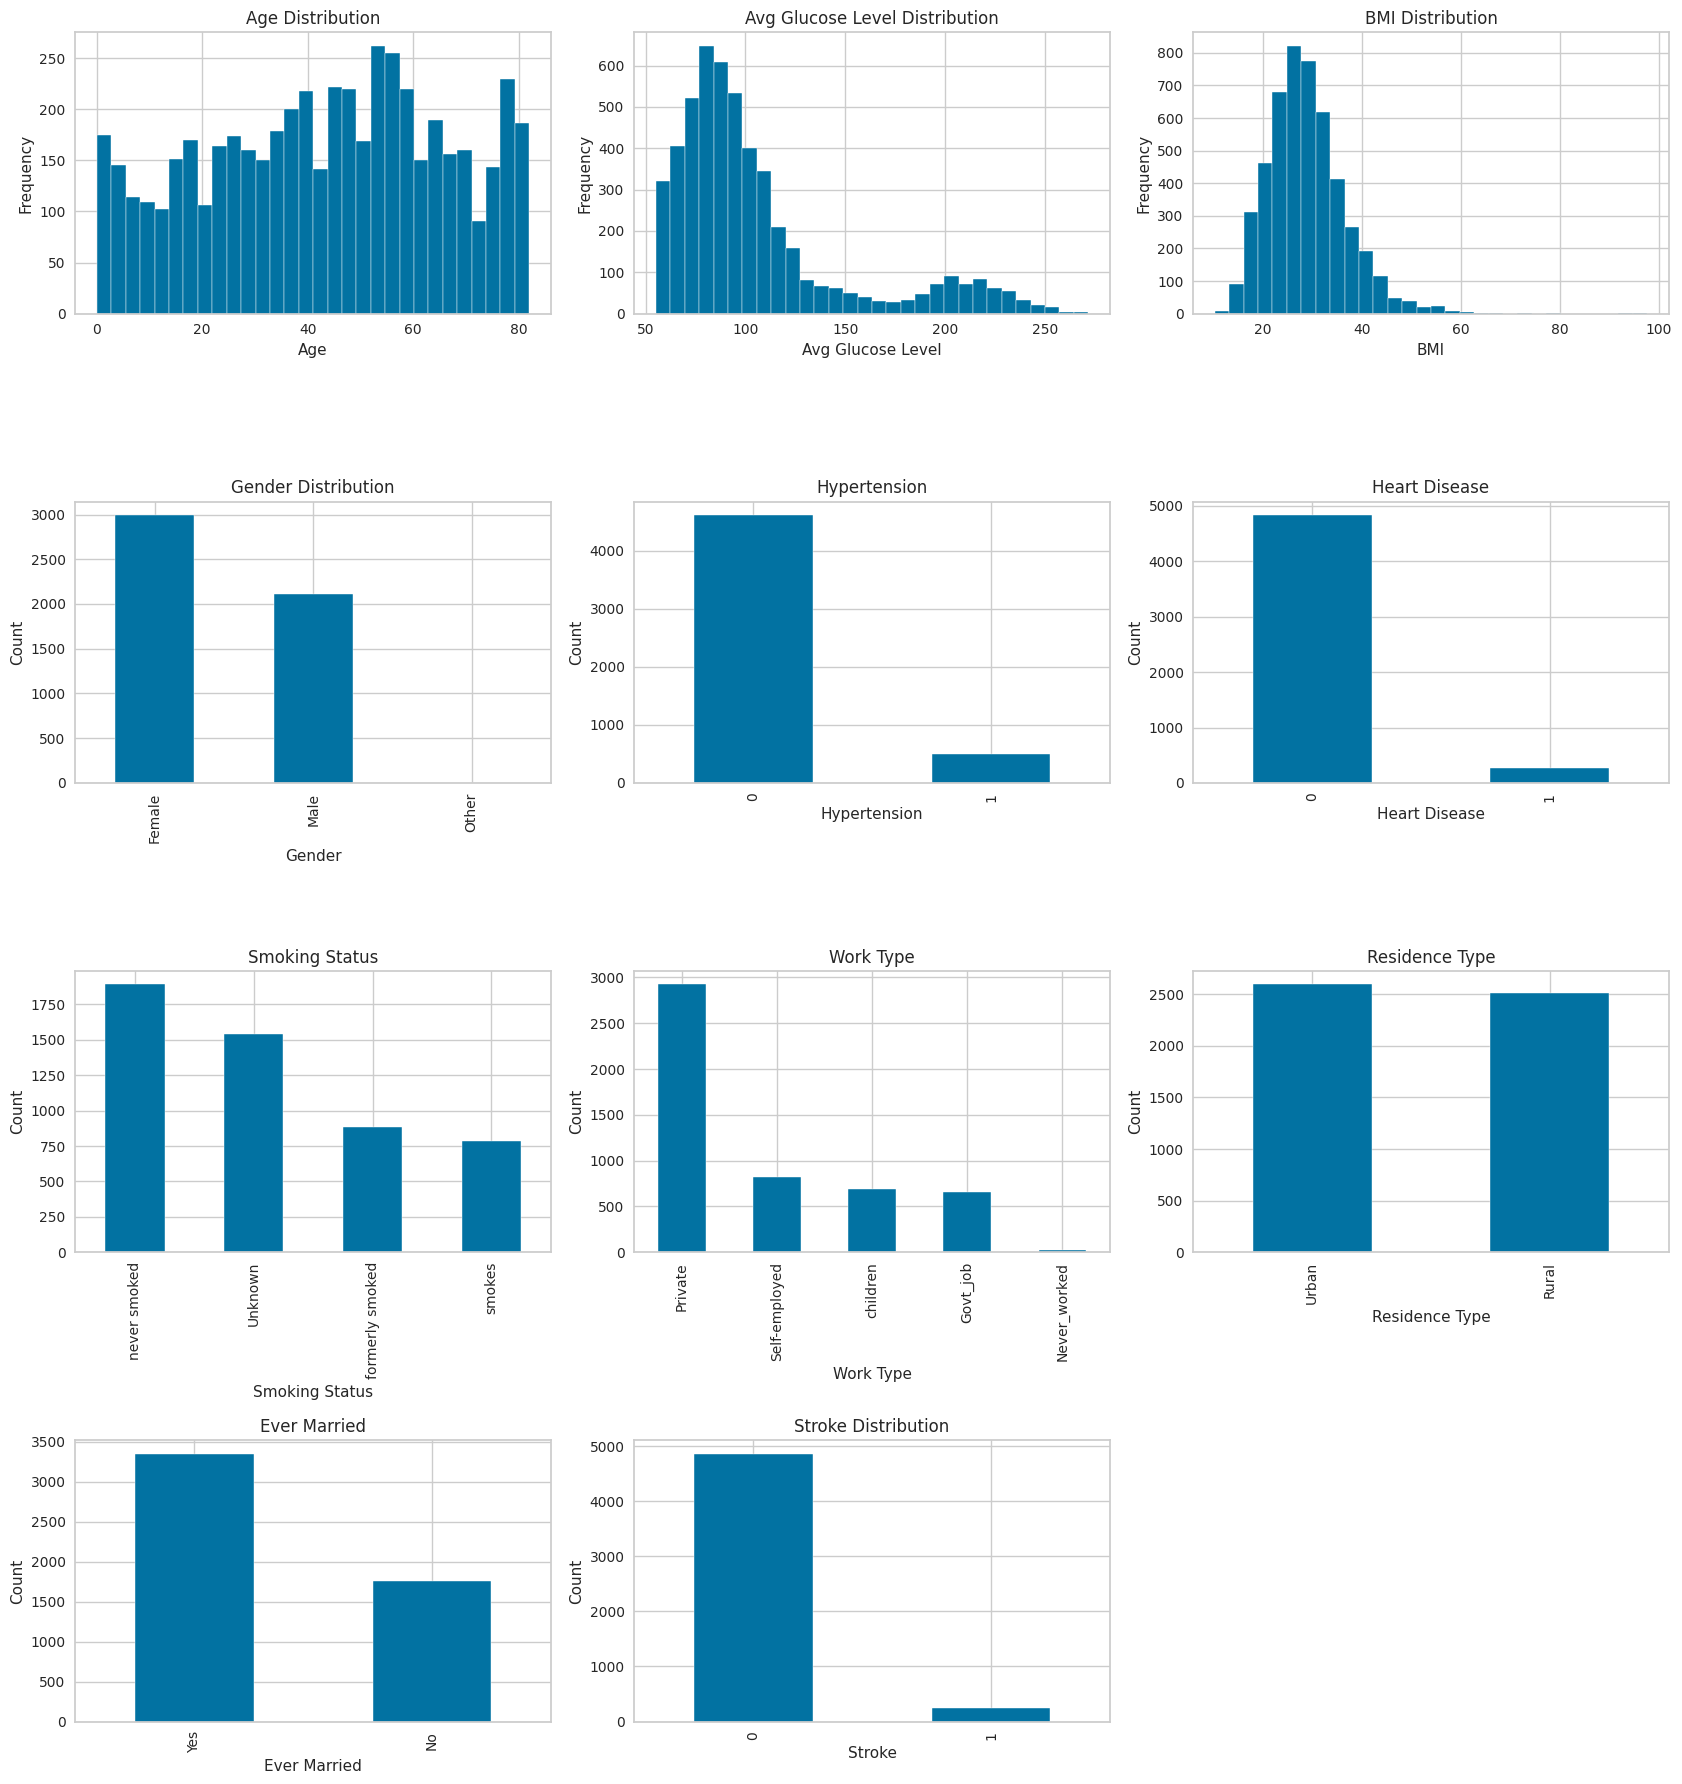

In [90]:
fig = plt.figure(figsize=(17, 18))
fig_dims = (4, 3)

# 1. Age (Histogram)
plt.subplot2grid(fig_dims, (0, 0))
plt.hist(df['age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Avg Glucose Level (Histogram)
plt.subplot2grid(fig_dims, (0, 1))
plt.hist(df['avg_glucose_level'], bins=30)
plt.title('Avg Glucose Level Distribution')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')

# 3. BMI (Histogram)
plt.subplot2grid(fig_dims, (0, 2))
plt.hist(df['bmi'].dropna(), bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# 4. Gender (Bar Chart)
plt.subplot2grid(fig_dims, (1, 0))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 5. Hypertension (Bar Chart)
plt.subplot2grid(fig_dims, (1, 1))
df['hypertension'].value_counts().plot(kind='bar')
plt.title('Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')

# 6. Heart Disease (Bar Chart)
plt.subplot2grid(fig_dims, (1, 2))
df['heart_disease'].value_counts().plot(kind='bar')
plt.title('Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# 7. Smoking Status by Stroke (Stacked Bar)
plt.subplot2grid(fig_dims, (2, 0))
df['smoking_status'].value_counts().plot(kind='bar')
plt.title('Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')


# 8. Work Type (Bar Chart)
plt.subplot2grid(fig_dims, (2, 1))
df['work_type'].value_counts().plot(kind='bar')
plt.title('Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')

# 9. Residence Type (Bar Chart)
plt.subplot2grid(fig_dims, (2, 2))
df['Residence_type'].value_counts().plot(kind='bar')
plt.title('Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')

# 10. Ever Married (Bar Chart)
plt.subplot2grid(fig_dims, (3, 0))
df['ever_married'].value_counts().plot(kind='bar')
plt.title('Ever Married')
plt.xlabel('Ever Married')
plt.ylabel('Count')

# 12. Stroke (Bar Chart)
plt.subplot2grid(fig_dims, (3, 1))
df['stroke'].value_counts().plot(kind='bar')
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Numerical features statistics

In [91]:
numerical_var = ['age','avg_glucose_level','bmi']

In [92]:
print(df[numerical_var].describe())

               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


Correlation matrix for numerical variables

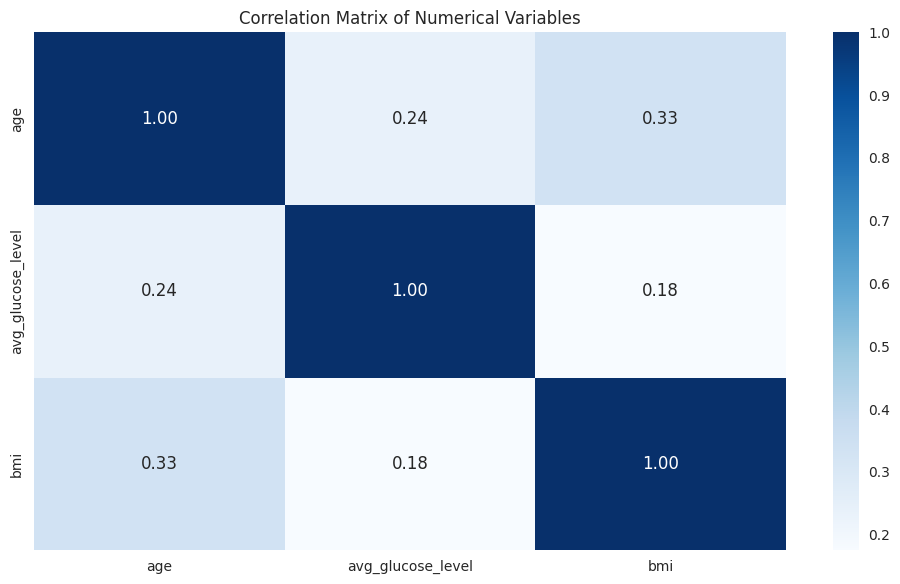

In [93]:
numerical_df = df[numerical_var]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="Blues")

plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

Categorical Features statistics

In [94]:
categorical_var = ['gender', 'ever_married','work_type','Residence_type','smoking_status','hypertension','stroke','heart_disease']

In [95]:
for var in categorical_var:
  print(df[var].value_counts(), "\n")

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 

hypertension
0    4612
1     498
Name: count, dtype: int64 

stroke
0    4861
1     249
Name: count, dtype: int64 

heart_disease
0    4834
1     276
Name: count, dtype: int64 



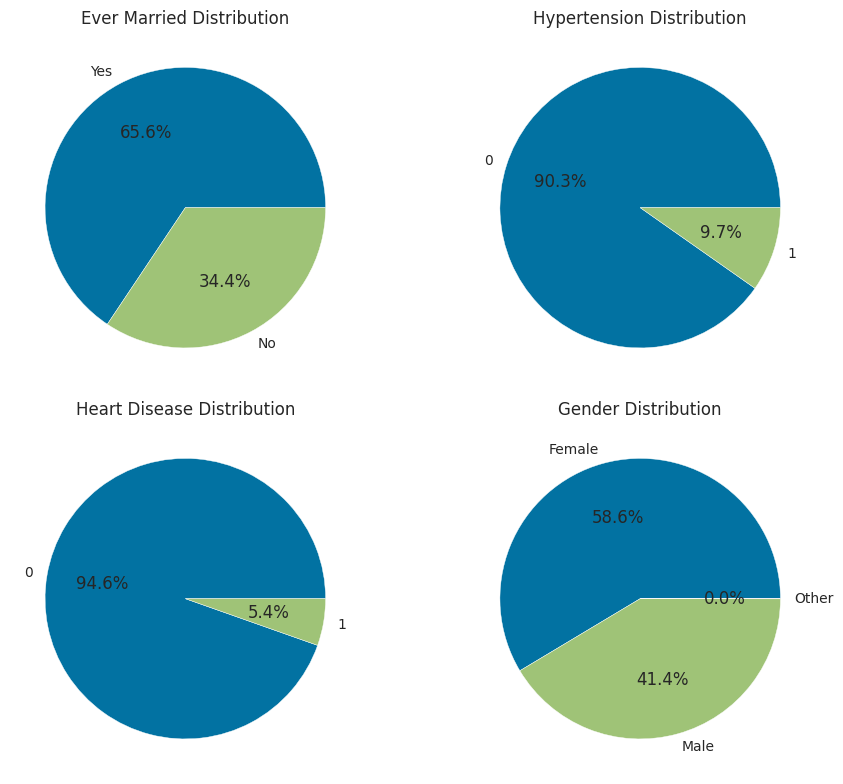

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Ever Married Distribution
df['ever_married'].value_counts().plot(kind ='pie', autopct='%1.1f%%', ax=axes[0, 0])
axes[0, 0].set_title('Ever Married Distribution')
axes[0, 0].set_ylabel('')

# Hypertension Distribution
df['hypertension'].value_counts().plot(kind ='pie', autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title('Hypertension Distribution')
axes[0, 1].set_ylabel('')

# Heart Disease Distribution
df['heart_disease'].value_counts().plot(kind ='pie', autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease Distribution')
axes[1, 0].set_ylabel('')

# Gender Distribution
df['gender'].value_counts().plot(kind ='pie', autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

### **TASK 1.2 BASIC STATISTICS:** Visualisations

Visualisation 1: Histogram of age by stroke

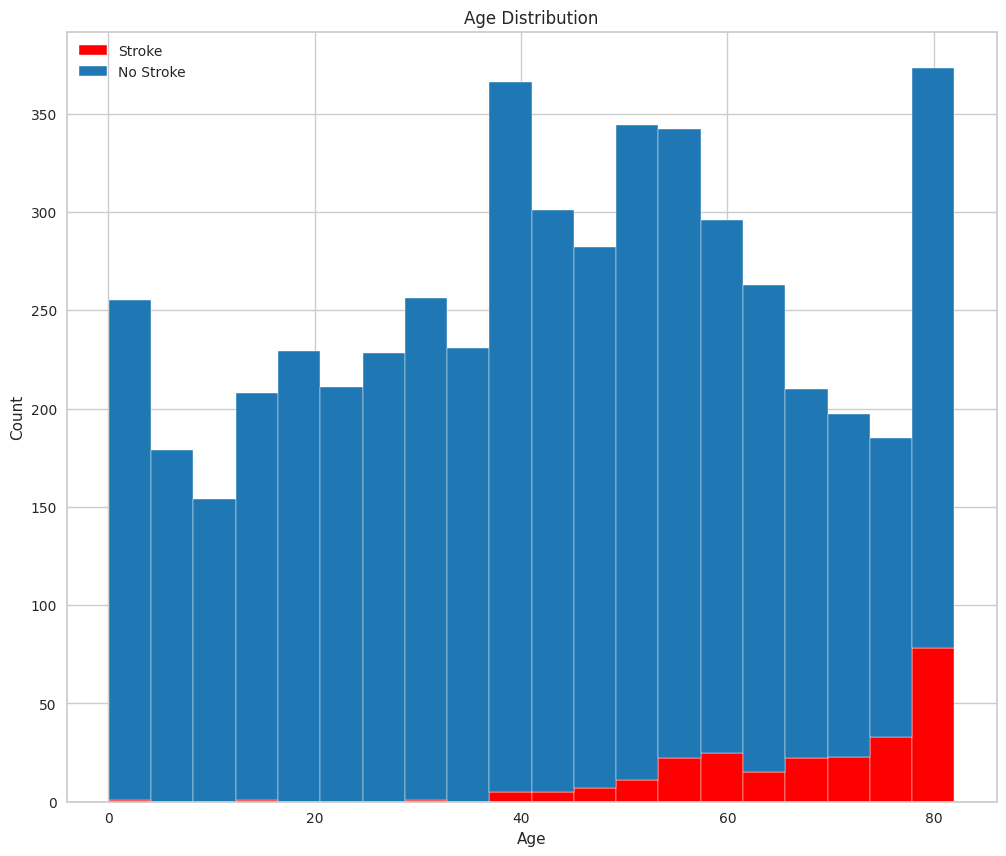

In [131]:
plt.figure(figsize=(12, 10))
plt.hist(
    [df[df['stroke'] == 1]['age'], df[df['stroke'] == 0]['age']],
    bins=20,
    stacked=True,
    label=['Stroke', 'No Stroke'],
    color=['red', '#1f77b4'],
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


Visualisation 2: Boxplot for age, glucose and BMI by stroke status (subplots)

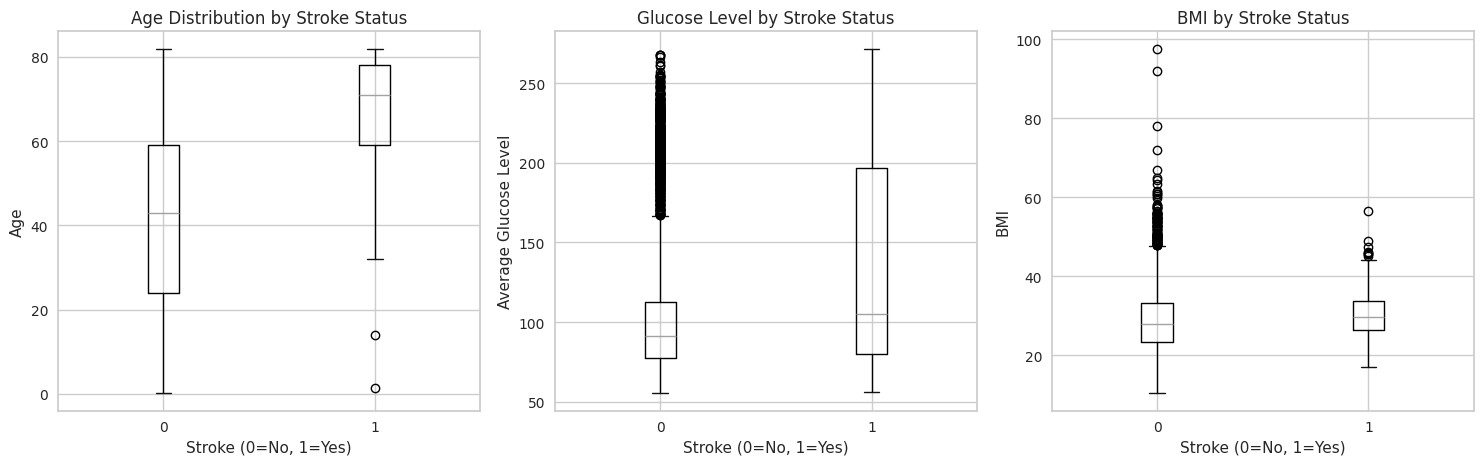

In [132]:
plt.figure(figsize=(15, 5))

# Age by stroke
plt.subplot(1, 3, 1)
df.boxplot(column='age', by='stroke', ax=plt.gca())
plt.title('Age Distribution by Stroke Status')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Age')

# Glucose by stroke
plt.subplot(1, 3, 2)
df.boxplot(column='avg_glucose_level', by='stroke', ax=plt.gca())
plt.title('Glucose Level by Stroke Status')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Average Glucose Level')

# BMI by stroke
plt.subplot(1, 3, 3)
df.boxplot(column='bmi', by='stroke', ax=plt.gca())
plt.title('BMI by Stroke Status')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

Visualisation 3: Scatter plot - Age vs Glucose vs Stroke

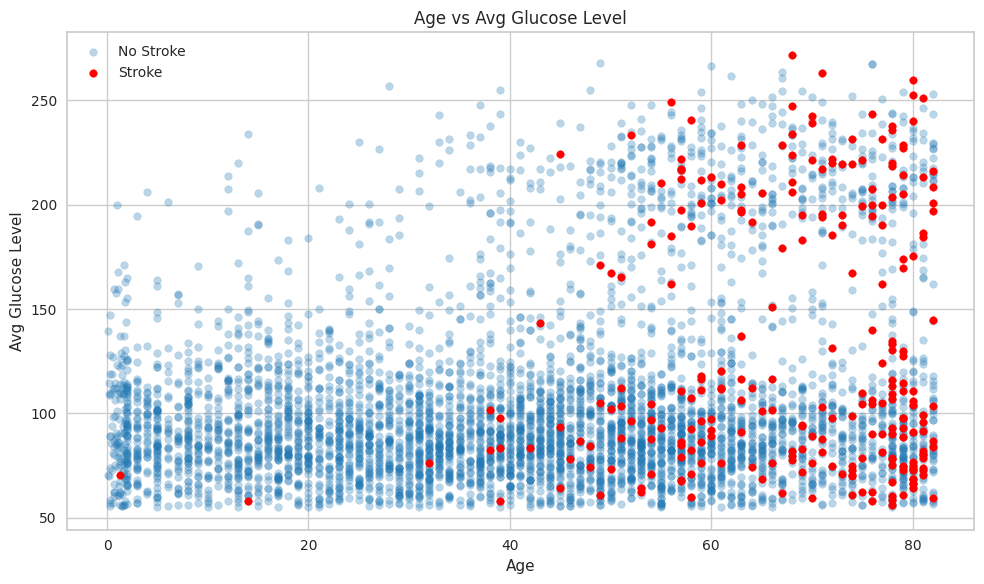

In [133]:
# No Stroke
plt.scatter(
    df[df['stroke'] == 0]['age'],
    df[df['stroke'] == 0]['avg_glucose_level'],
    s=30,
    color='#1f77b4',
    label='No Stroke',
    alpha = 0.3
)

# Stroke
plt.scatter(
    df[df['stroke'] == 1]['age'],
    df[df['stroke'] == 1]['avg_glucose_level'],
    s=30,
    color='red',
    label='Stroke'
)

plt.title('Age vs Avg Glucose Level')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.legend()
plt.tight_layout()
plt.show()

Visualisation 4: Scatter plot - Age vs BMI vs stroke

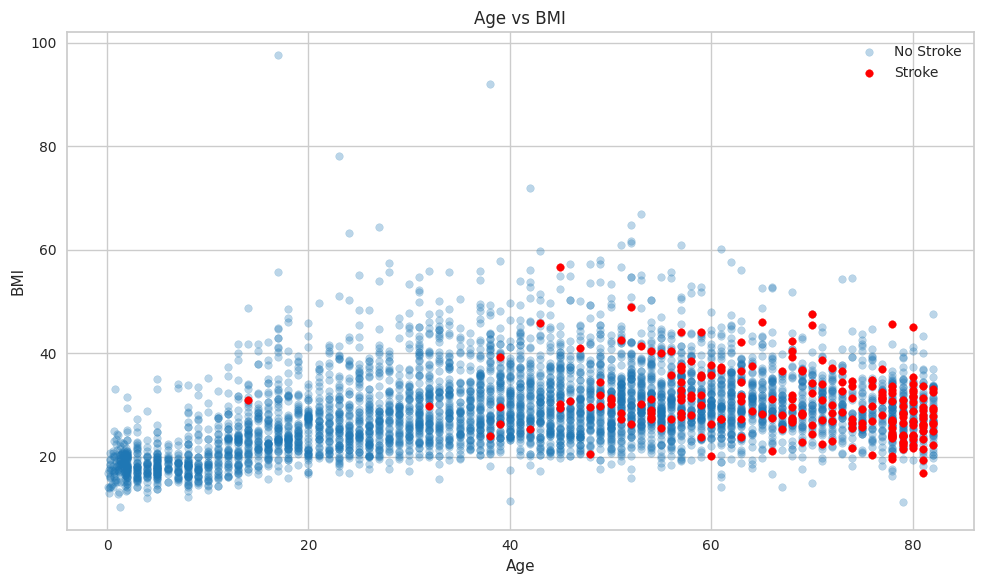

In [134]:
# No Stroke
plt.scatter(
    df[df['stroke'] == 0]['age'],
    df[df['stroke'] == 0]['bmi'],
    s=30,
    color='#1f77b4',
    label='No Stroke',
    alpha = 0.3
)

# Stroke
plt.scatter(
    df[df['stroke'] == 1]['age'],
    df[df['stroke'] == 1]['bmi'],
    s=30,
    color='red',
    label='Stroke'
)

plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.tight_layout()
plt.show()

Visualisation 5: Stacked Bar chart for work type, smoking status and ever married (subplots)

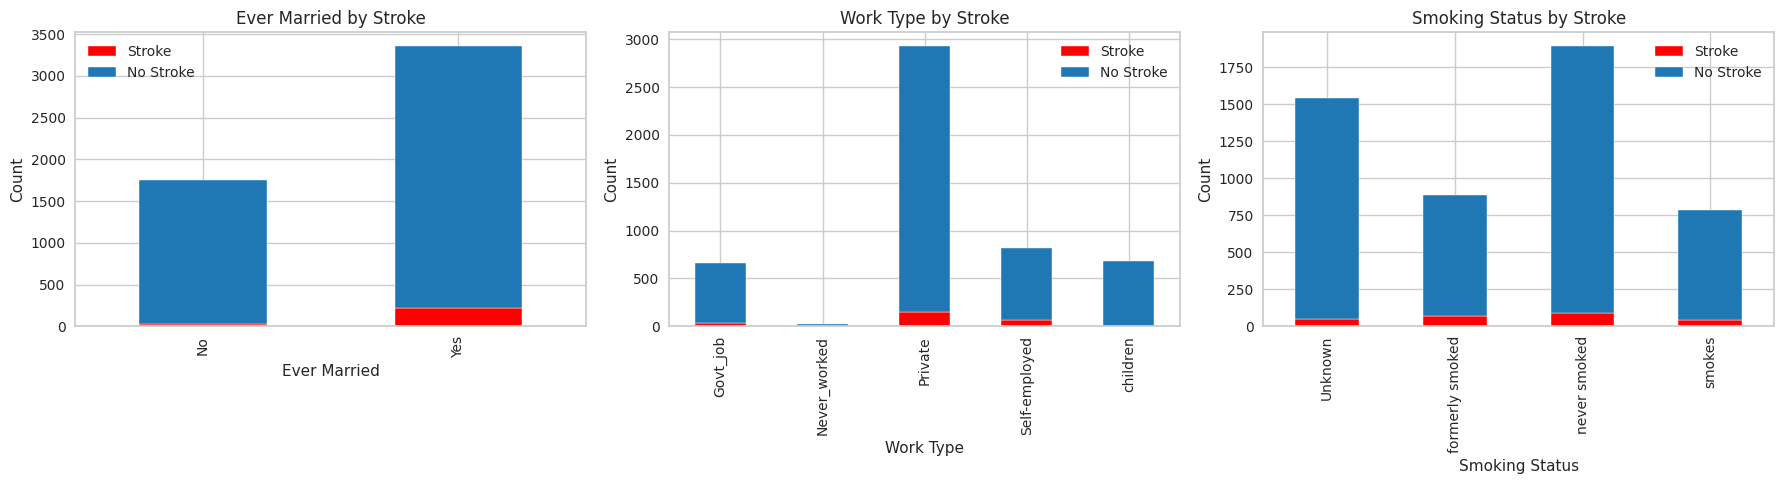

In [135]:
fizsize_with_subplots = (18, 5)
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (1, 3)


# Ever Married by Stroke
plt.subplot2grid(fig_dims, (0, 0))
df.groupby(['ever_married', 'stroke']).size().unstack(fill_value=0)[[1, 0]].plot(
    kind='bar', stacked=True, ax=plt.gca(), color=['red', '#1f77b4']
)
plt.title('Ever Married by Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(['Stroke', 'No Stroke'])

# Work Type by Stroke
plt.subplot2grid(fig_dims, (0, 1))
df.groupby(['work_type', 'stroke']).size().unstack(fill_value=0)[[1, 0]].plot(
    kind='bar', stacked=True, ax=plt.gca(), color=['red', '#1f77b4']
)
plt.title('Work Type by Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(['Stroke', 'No Stroke'])


# Smoking Status by Stroke
plt.subplot2grid(fig_dims, (0, 2))
df.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)[[1, 0]].plot(
    kind='bar', stacked=True, ax=plt.gca(), color=['red', '#1f77b4']
)
plt.title('Smoking Status by Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(['Stroke', 'No Stroke'])

plt.tight_layout()
plt.show()


Visualisation 6: correlation matrix of all variables

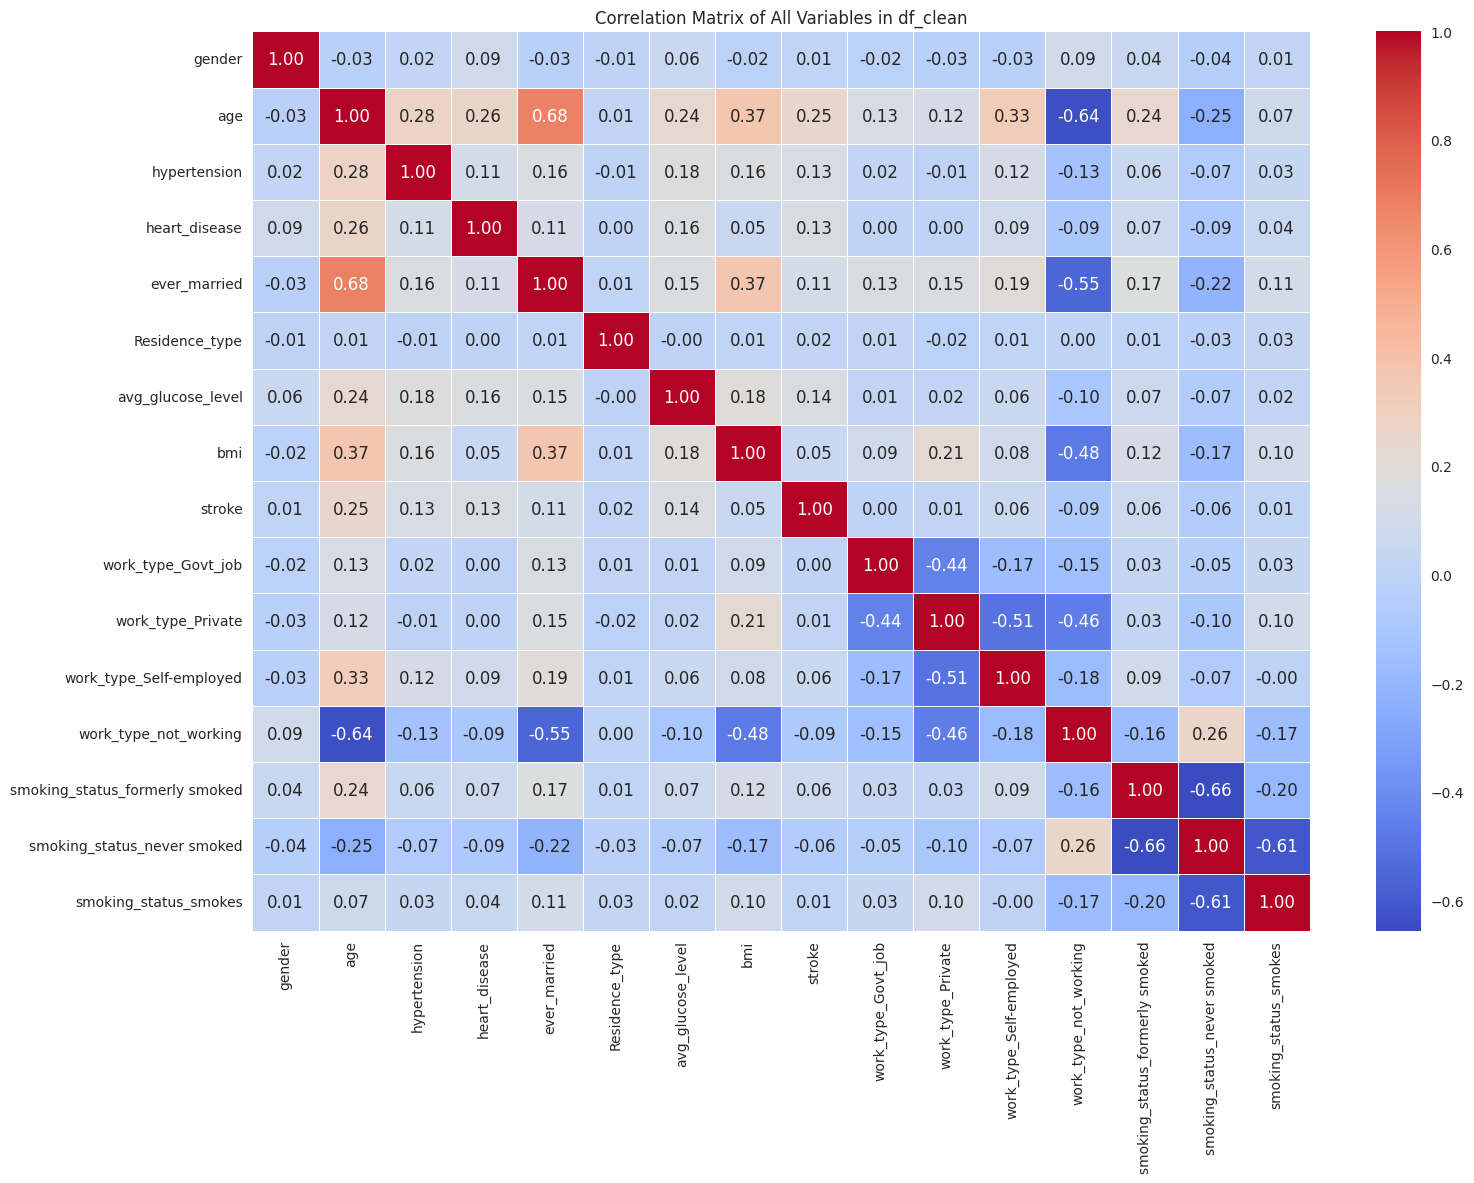

In [136]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of All Variables in df_clean')
plt.tight_layout()
plt.show()

###**TASK 2 Data Preparation** for all models

In [97]:
df_clean = df.copy()

2.1 Remove "Other" Group in gender

In [98]:
df_clean['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [99]:
# Drop "other" from gender
df_clean = df_clean[df_clean['gender'] != 'Other']

In [100]:
df_clean['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


2.2 Handle missing values in BMI

In [101]:
df_clean['bmi'].isna().sum()

np.int64(201)

In [102]:
# Replacing missings with medians of each age group and gender

df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['0–18','19–30','31–45','46–60','60+'])

df_clean['bmi'] = df_clean.groupby(['gender', 'age_group'])['bmi'] \
              .transform(lambda x: x.fillna(x.median()))

In [103]:
df_clean['bmi'].isna().sum()

np.int64(0)

2.3 Handle unknown group in smoking_status

In [104]:
# mode per age_group, excluding 'Unknown'
modes = (
    df_clean[df_clean['smoking_status'] != 'Unknown']
    .groupby('age_group')['smoking_status']
    .agg(lambda x: x.mode().iloc[0])
)

# replace 'Unknown' using the group mode
mask = df_clean['smoking_status'] == 'Unknown'
df_clean.loc[mask, 'smoking_status'] = df_clean.loc[mask, 'age_group'].map(modes)


2.4 Handle extreme outliers with winsorisation

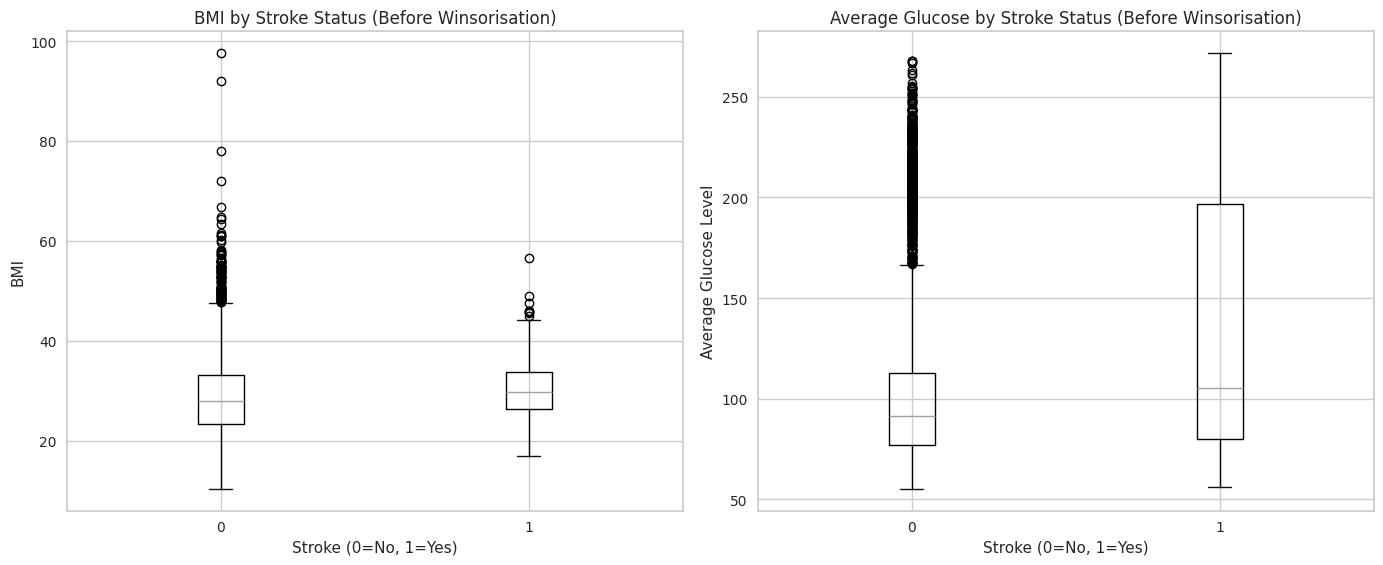

In [105]:
plt.figure(figsize=(14, 6))

# BMI by stroke
plt.subplot(1, 2, 1)
df.boxplot(column='bmi', by='stroke', ax=plt.gca())
plt.title('BMI by Stroke Status (Before Winsorisation)')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('BMI')

# Avg Glucose by stroke
plt.subplot(1, 2, 2)
df.boxplot(column='avg_glucose_level', by='stroke', ax=plt.gca())
plt.title('Average Glucose by Stroke Status (Before Winsorisation)')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Average Glucose Level')

plt.tight_layout()
plt.show()


In [106]:
from scipy.stats.mstats import winsorize

In [107]:
df_clean[['avg_glucose_level', 'bmi']] = (
    df_clean
    .groupby('stroke')[['avg_glucose_level', 'bmi']]
    .transform(lambda x: winsorize(x, limits=[0.05, 0.05]))
)

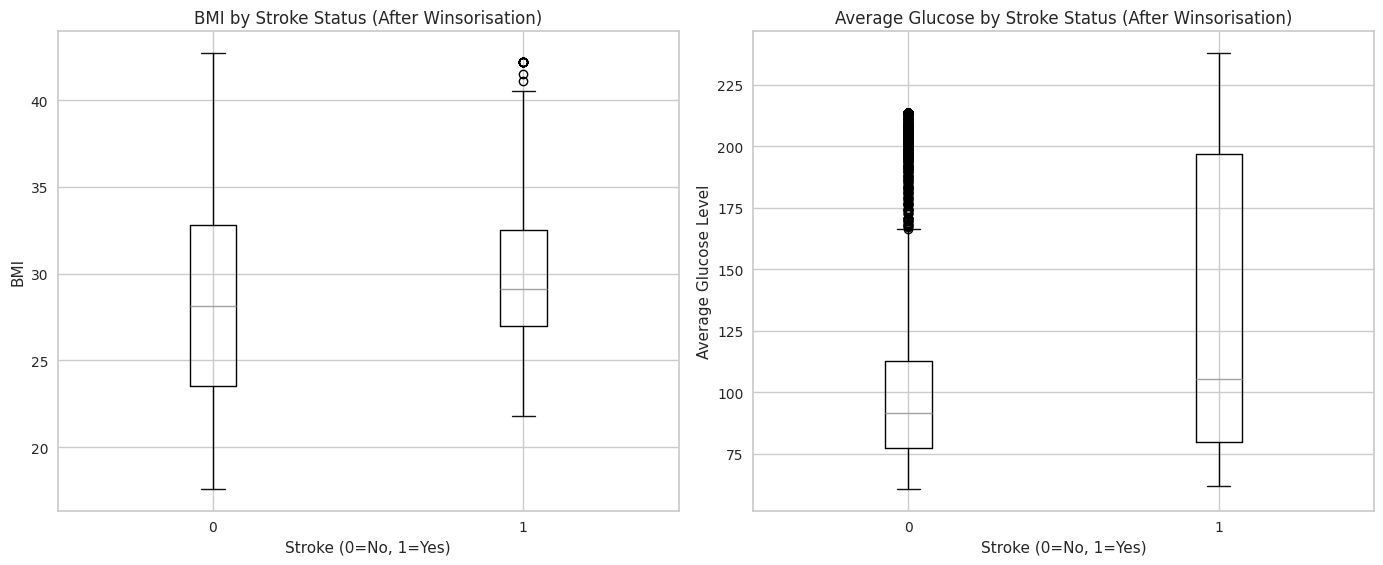

In [108]:
plt.figure(figsize=(14, 6))

# BMI by stroke after Winsorisation
plt.subplot(1, 2, 1)
df_clean.boxplot(column='bmi', by='stroke', ax=plt.gca())
plt.title('BMI by Stroke Status (After Winsorisation)')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('BMI')

# Avg Glucose by stroke after Winsorisation
plt.subplot(1, 2, 2)
df_clean.boxplot(column='avg_glucose_level', by='stroke', ax=plt.gca())
plt.title('Average Glucose by Stroke Status (After Winsorisation)')
plt.suptitle('')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Average Glucose Level')

plt.tight_layout()
plt.show()

2.5 Handle 'Never_worked' and 'children' in 'work_type' by combining them into 'not_working'

In [109]:
df_clean['work_type'] = df_clean['work_type'].replace(['Never_worked', 'children'], 'not_working')
df_clean['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,819
not_working,709
Govt_job,657


2.6 Remove Features that won't be used (id and age group)

In [110]:
df_clean = df_clean.drop(columns=['id', 'age_group'])
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2.6 One Hot Encoding

In [111]:
onehot_cols = ['work_type', 'smoking_status']

df_clean = pd.get_dummies(df_clean, columns=onehot_cols, drop_first=False, dtype=int)

In [112]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_not_working,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,1,0,1,0,0,1,0,0
1,Female,61.0,0,0,Yes,Rural,202.21,29.1,1,0,0,1,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,1,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,1,0,1,0,0,0,0,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,1,0,0,1,0,0,1,0


2.7 Label Encoding

In [113]:
label_cols = ['gender', 'ever_married', 'Residence_type']

for col in label_cols:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col])

In [114]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_not_working,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


(optional)  Feature selection based on Pearsons coefficient

In [115]:
df_corr = df_clean.copy()

In [116]:
pearsoncorr = df_corr.corr()['stroke'].drop('stroke').sort_values(ascending = False)
pearsoncorr

,stroke
age,0.245239
avg_glucose_level,0.140269
heart_disease,0.134905
hypertension,0.127891
ever_married,0.108299
smoking_status_formerly smoked,0.064683
work_type_Self-employed,0.062150
bmi,0.049987
Residence_type,0.015415
work_type_Private,0.011927


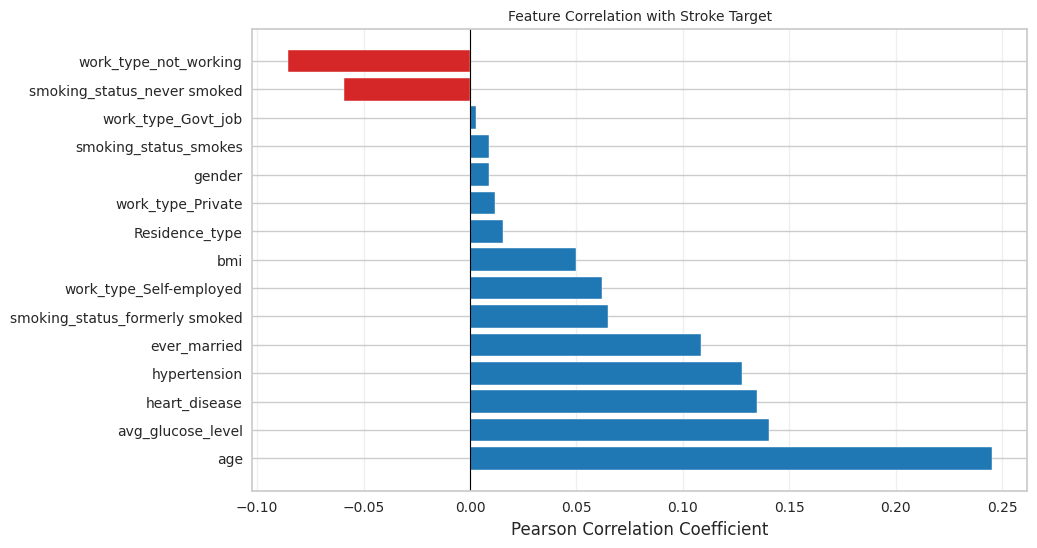

In [117]:
## Visualise numeric feature correlations
plt.figure(figsize=(10, 6))

colors = ['#1f77b4' if x > 0 else '#d62728' for x in pearsoncorr.values]

plt.barh(range(len(pearsoncorr)), pearsoncorr.values, color=colors)
plt.yticks(range(len(pearsoncorr)), pearsoncorr.index)
plt.xlabel('Pearson Correlation Coefficient', fontsize=12)
plt.title('Feature Correlation with Stroke Target', fontsize=10,)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)


### **TASK 2.2 Data Preparation** for Classification

In [165]:
df_class = df_clean.copy()
df_class.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_not_working,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


Separate features and target

In [166]:
# Separate features and target
X_class = df_class.drop('stroke', axis=1)
y_class = df_class['stroke']

print("Classification data shape:", X_class.shape)
print("Target distribution:", y_class.value_counts())

Classification data shape: (5109, 15)
Target distribution: stroke
0    4860
1     249
Name: count, dtype: int64


Split data (before any preprocessing)

In [167]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class # Preserve class distribution
)

In [168]:
print("Training set:", X_train_class.shape)
print("Test set:", X_test_class.shape)

Training set: (4087, 15)
Test set: (1022, 15)


Handle class imbalance with SMOTE

In [169]:
smote = SMOTE(random_state=42)
X_train_class_res, y_train_class_res = smote.fit_resample(
    X_train_class, y_train_class
)

Scale Features

In [170]:
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class_res)
X_test_class_scaled = scaler_class.transform(X_test_class)

In [171]:
print("Training set:", X_train_class.shape)
print("Test set:", X_test_class.shape)

Training set: (4087, 15)
Test set: (1022, 15)


### **TASK 2.3 Data Preparation** for Regression

In [172]:
df_reg = df_clean.copy()
df_reg.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_not_working,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


In [173]:
X_reg = df_reg.drop('bmi', axis = 1)
y_reg = df_reg['bmi']

print("Classification data shape:", X_reg.shape)
print("Target distribution:", y_reg.describe())

Classification data shape: (5109, 15)
Target distribution: count    5109.000000
mean       28.654923
std         6.724301
min        17.600000
25%        23.700000
50%        28.300000
75%        32.800000
max        42.700000
Name: bmi, dtype: float64


Split Data (Before any preprocessing)

In [174]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

print("Training set:", X_train_reg.shape)
print("Test set:", X_test_reg.shape)

Training set: (4087, 15)
Test set: (1022, 15)


Scale Features

In [175]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

### **TASK 2.4 Data Preparation** for Clustering

In [176]:
df_clust = df_clean.copy()
df_clust.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_not_working,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


Scale Features

In [177]:
# Scale features for clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(df_clust)
X_cluster_scaled_df = pd.DataFrame(X_cluster_scaled, index=df_clust.index, columns=df_clust.columns)

In [178]:
X_cluster_scaled_df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_not_working,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5109.000000,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03
mean,4.728607e-17,7.231987e-17,-6.119374e-17,-6.953834e-17,9.179061e-17,-8.622754e-17,-1.056983e-16,-1.446397e-16,0.000000,4.172300e-17,-5.006760e-17,3.685532e-17,5.006760e-17,6.049835e-17,8.900907e-17,3.615994e-17
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-8.404837e-01,-1.908332e+00,-3.286375e-01,-2.389715e-01,-1.381830e+00,-1.016380e+00,-1.043618e+00,-1.644186e+00,-0.226351,-3.841538e-01,-1.156812e+00,-4.369314e-01,-4.014179e-01,-4.574175e-01,-1.433107e+00,-4.273627e-01
25%,-8.404837e-01,-8.062312e-01,-3.286375e-01,-2.389715e-01,-1.381830e+00,-1.016380e+00,-6.576694e-01,-7.369402e-01,-0.226351,-3.841538e-01,-1.156812e+00,-4.369314e-01,-4.014179e-01,-4.574175e-01,-1.433107e+00,-4.273627e-01
50%,-8.404837e-01,7.827984e-02,-3.286375e-01,-2.389715e-01,7.236782e-01,9.838840e-01,-3.166745e-01,-5.278726e-02,-0.226351,-3.841538e-01,8.644443e-01,-4.369314e-01,-4.014179e-01,-4.574175e-01,6.977846e-01,-4.273627e-01
75%,1.189791e+00,7.858887e-01,-3.286375e-01,-2.389715e-01,7.236782e-01,9.838840e-01,2.006407e-01,6.164928e-01,-0.226351,-3.841538e-01,8.644443e-01,-4.369314e-01,-4.014179e-01,-4.574175e-01,6.977846e-01,-4.273627e-01
max,1.189791e+00,1.714625e+00,3.042866e+00,4.184599e+00,7.236782e-01,9.838840e-01,3.080929e+00,2.088909e+00,4.417926,2.603124e+00,8.644443e-01,2.288689e+00,2.491169e+00,2.186187e+00,6.977846e-01,2.339933e+00


### **TASK 3 Classification**

In [ ]:
#insert code for model 1 (data preparation is already done, you just have to initialise the model)

In [ ]:
#insert code for model 2

In [ ]:
#insert code for model 3

In [ ]:
#Compare all 3 models

### **TASK 4 Regression**

model 1 (Linear Regression)

In [179]:
# initialize the Naive Bayes classifier
LR = LinearRegression()

#fit the classifier to the data
LR.fit(X_train_reg, y_train_reg)

#use the resulting model to predict value on the test sey
y_pred = LR.predict(X_test_reg)

print('Mean Absolute Error:', mean_absolute_error(y_test_reg, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_reg, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_reg, y_pred)), '\n')

print("R2 score:", r2_score(y_test_reg, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test_reg, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test_reg.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 4.576560912957183
Mean Squared Error: 33.598010080402155
Root Mean Squared Error: 5.7963790490617635 

R2 score: 0.24685434903928316
Adjusted R2 score: 0.23562454311044545


In [180]:
# Display the coefficients, t-test and p values
X2 = sm.add_constant(X_reg)
est = sm.OLS(y_reg, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:40:47   Log-Likelihood:                -16202.
No. Observations:                5109   AIC:                         3.243e+04
Df Residuals:                    5095   BIC:                         3.252e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

model 2 (Dicision Tree)

In [181]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train_reg, y_train_reg)
regr_2.fit(X_train_reg, y_train_reg)

# Predict
y1_pred = regr_1.predict(X_test_reg)
y2_pred = regr_2.predict(X_test_reg)

print('Mean Absolute Error:', mean_absolute_error(y_test_reg, y2_pred))
print('Mean Squared Error:', mean_squared_error(y_test_reg, y2_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_reg, y2_pred)), '\n')

print("R2 score:", r2_score(y_test_reg, y2_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test_reg, y2_pred))*(len(y2_pred)-1)/(len(y2_pred)-X_test_reg.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 4.456989802439794
Mean Squared Error: 32.257839573515334
Root Mean Squared Error: 5.679598539819107 

R2 score: 0.27689611598893893
Adjusted R2 score: 0.26611424893112


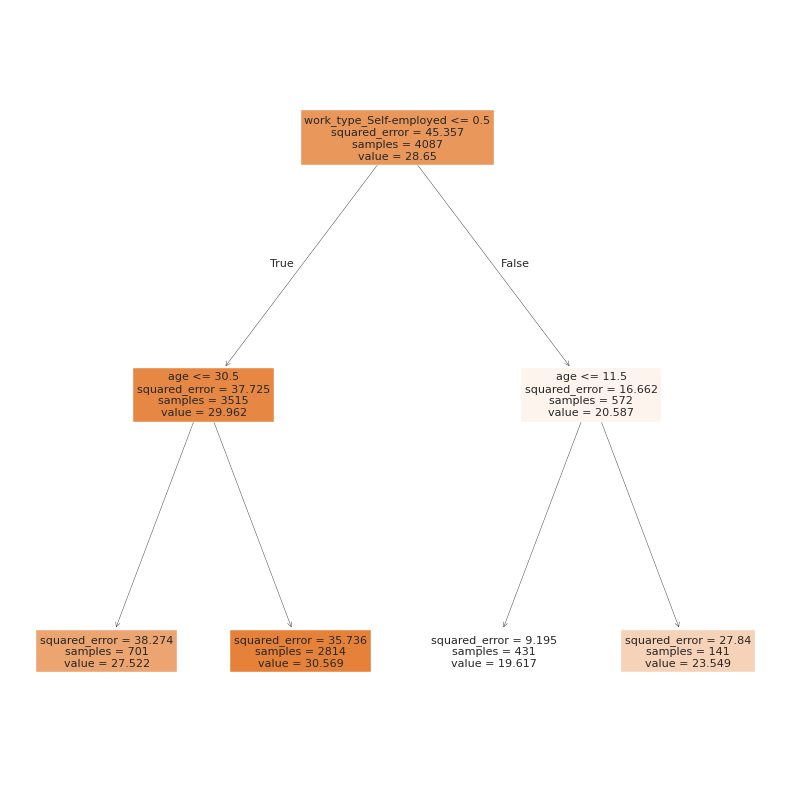

In [182]:
plt.figure(figsize=(10, 10))
features = df_clean.columns
classes = ['<=50k','>50k']
tree.plot_tree(regr_1,feature_names=features,class_names=classes,filled=True)
plt.show()

**Comparrison**

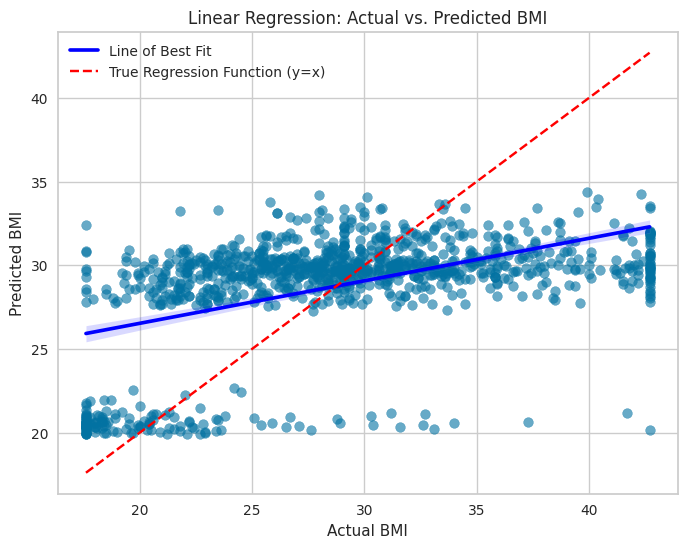

In [183]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test_reg, y_pred, alpha=0.6)

# Add the line of best fit (regression line)
sns.regplot(x=y_test_reg, y=y_pred, scatter=False, color='blue', label='Line of Best Fit')

# Add the true regression function line (y = x, representing perfect prediction)
min_val = min(y_test_reg.min(), y_pred.min())
max_val = max(y_test_reg.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='True Regression Function (y=x)')

plt.title('Linear Regression: Actual vs. Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.legend()
plt.grid(True)
plt.show()

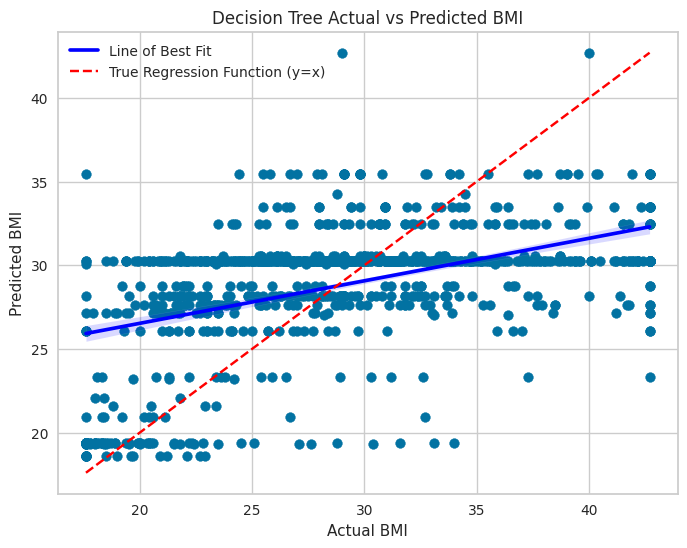

In [184]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test_reg, y2_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add the line of best fit (regression line)
sns.regplot(x=y_test_reg, y=y_pred, scatter=False, color='blue', label='Line of Best Fit')

# Add the true regression function line (y = x, representing perfect prediction)
min_val = min(y_test_reg.min(), y_pred.min())
max_val = max(y_test_reg.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='True Regression Function (y=x)')

plt.title('Decision Tree Actual vs Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.legend()
plt.grid(True)
plt.show()

### **TASK 5 Clustering**

k-means

In [185]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_cluster_scaled_df)

KMeans(n_clusters=2, random_state=0)

In [186]:
kmeans.cluster_centers_

array([[ 0.09744149, -1.28789673, -0.32593813, -0.23542983, -1.38182969,
        -0.02986067, -0.25968617, -0.87622617, -0.21891375, -0.28848435,
        -0.40106633, -0.36491747,  1.24057106, -0.42566885,  0.66366306,
        -0.41628467],
       [-0.03152964,  0.41673135,  0.10546547,  0.07617924,  0.44712572,
         0.00966217,  0.08402799,  0.283525  ,  0.07083504,  0.09334636,
         0.12977509,  0.11807822, -0.40141794,  0.13773585, -0.21474486,
         0.13469937]])

In [187]:
# Compute the silhouette score
kmeans_silhouette = silhouette_score(X_cluster_scaled_df, kmeans.labels_).round(2)
kmeans_silhouette

np.float64(0.14)

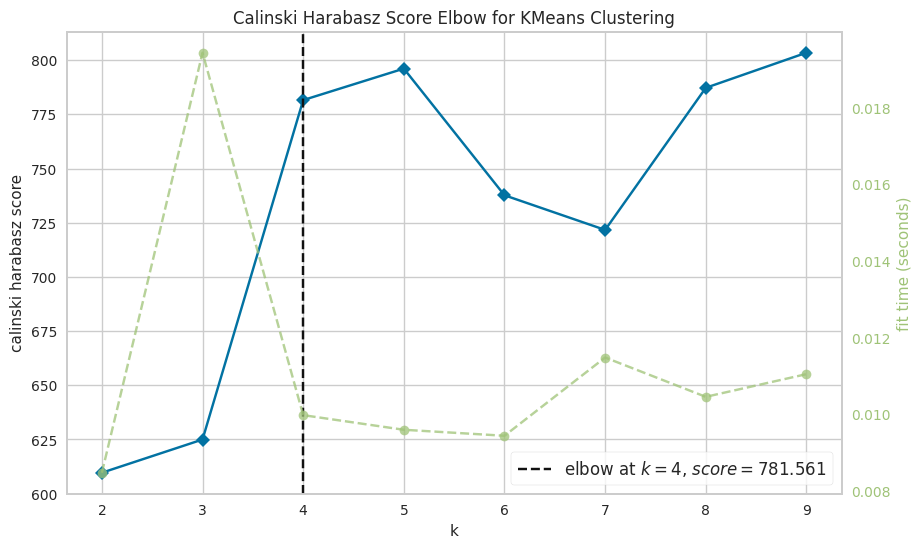

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [188]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(X_cluster_scaled_df)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

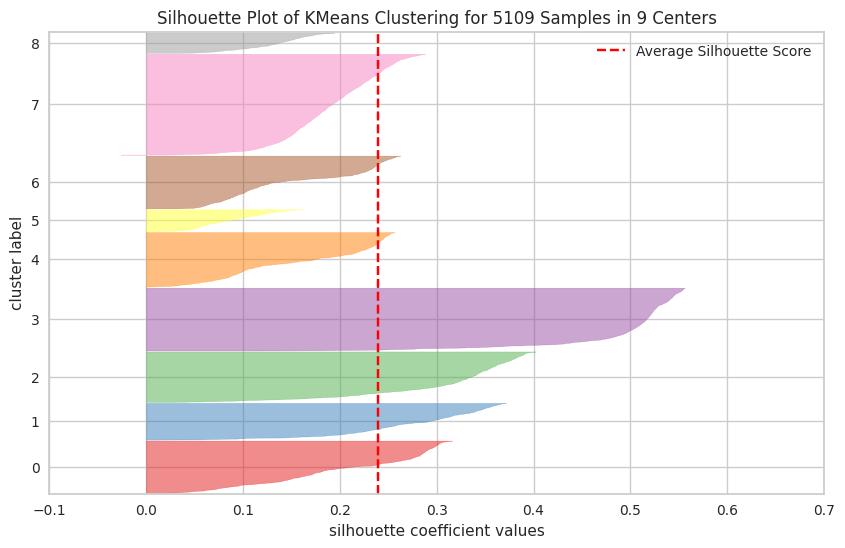

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5109 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [189]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_cluster_scaled_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [190]:
X_cluster_scaled_df.shape

(5109, 16)

model 2 (k-prototypes)

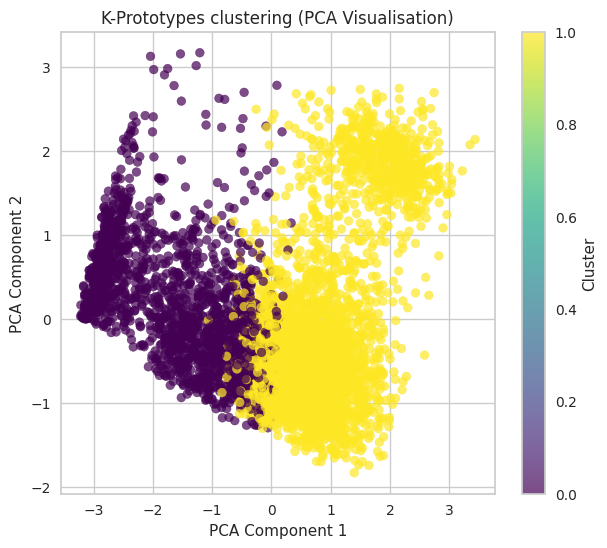

In [191]:
# Define numerical and categorical columns for K-Prototypes
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = [col for col in X_cluster_scaled_df.columns if col not in numeric_cols]

# Prepare data for K-Prototypes
data_matrix = X_cluster_scaled_df.to_numpy()
categorical_idx = [X_cluster_scaled_df.columns.get_loc(c) for c in categorical_cols]

# Fit K-Prototypes
kproto = KPrototypes(n_clusters=2, init='Huang', random_state=42, n_init=5)
clusters = kproto.fit_predict(data_matrix, categorical=categorical_idx)

# Attach clusters to dataframe
X_cluster_scaled_df["cluster"] = clusters


# VISUALIZATION

# One-hot encode categoricals for visualization (using a separate encoder to avoid conflicts)
enc_viz = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Use ignore for unknown categories
cat_encoded = enc_viz.fit_transform(X_cluster_scaled_df[categorical_cols])

# Scale numerics (if not already scaled or for PCA consistency)
scaler_viz = StandardScaler()
num_scaled = scaler_viz.fit_transform(X_cluster_scaled_df[numeric_cols])

# Combine encoded data
visual_matrix = np.hstack([num_scaled, cat_encoded])

# Reduce to 2D with PCA
pca = PCA(n_components=2)
components = pca.fit_transform(visual_matrix)

# Plot clusters
plt.figure(figsize=(7,6))
plt.scatter(components[:,0], components[:,1],
            c=X_cluster_scaled_df["cluster"], s=40, alpha=0.7, cmap='viridis')

plt.title("K-Prototypes clustering (PCA Visualisation)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

HDBSCAN

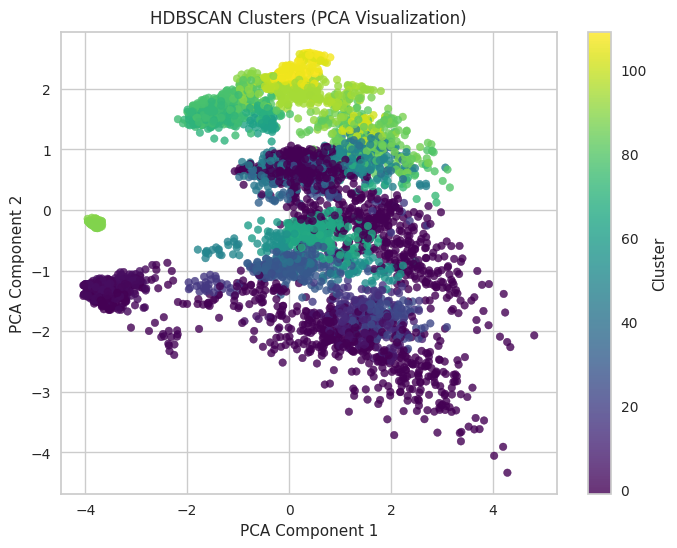

In [196]:
# Identify column types
cat_cols = X_cluster_scaled_df.select_dtypes(include='object').columns
num_cols = X_cluster_scaled_df.select_dtypes(include='number').columns

# Convert categoricals to strings
X_cluster_scaled_df[cat_cols] = X_cluster_scaled_df[cat_cols].astype(str)

gower_dist = gower.gower_matrix(X_cluster_scaled_df)

# Fix: Convert gower_dist to float64 to prevent dtype mismatch with hdbscan
gower_dist = gower_dist.astype(np.float64)

clusterer = hdbscan.HDBSCAN(
    metric='precomputed',
    min_cluster_size=10,
    min_samples=5,
    cluster_selection_method='leaf'
)

labels = clusterer.fit_predict(gower_dist)

X_cluster_scaled_df["cluster"] = labels

enc = OneHotEncoder(sparse_output=False)
cat_encoded = enc.fit_transform(X_cluster_scaled_df[cat_cols])

# Scale numeric features
scaler = StandardScaler()
num_scaled = scaler.fit_transform(X_cluster_scaled_df[num_cols])

# Combine encoded data
visual_matrix = np.hstack([num_scaled, cat_encoded])

pca = PCA(n_components=2)
components = pca.fit_transform(visual_matrix)


plt.figure(figsize=(8, 6))
plt.scatter(
    components[:,0], components[:,1],
    c=X_cluster_scaled_df["cluster"],
    s=30,
    cmap="viridis",
    alpha=0.8
)

plt.title("HDBSCAN Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

comparing

In [194]:
# Davies-Bouldin Index for K-Prototype


db_index_kproto = davies_bouldin_score(visual_matrix, X_cluster_scaled_df["cluster"])

print(f"Davies-Bouldin Index (K-Prototypes): {db_index_kproto:.2f}")

Davies-Bouldin Index (K-Prototypes): 1.86


In [197]:
#Davies-Bouldin Index for HDBSCAN

# Filter out noise
non_noise_indices = labels != -1
filtered_scaled_features = X_cluster_scaled_df[non_noise_indices]
filtered_labels = labels[non_noise_indices]

if len(np.unique(filtered_labels)) >= 2:
   db_index = davies_bouldin_score(filtered_scaled_features, filtered_labels)
   print(f"Davies-Bouldin Index (HDBSCAN, excluding noise): {db_index:.2f}")
else:
   print("Cannot calculate Davies-Bouldin Index: Less than 2 clusters found after filtering noise.")

Davies-Bouldin Index (HDBSCAN, excluding noise): 0.70
